In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import datetime

import joblib


# from cap_modules import *

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/fraudTrain.csv', sep = ',')

In [3]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
(df['is_fraud'].value_counts()[1] / df['is_fraud'].shape[0]) * 100

0.5788651743883394

0.5789 percent of the training set is fraud. It is a very imbalanced

In [8]:
px.histogram(df[df['is_fraud'] == 1], x="amt", text_auto=True)

In [9]:
%load_ext autoreload
%autoreload 2
from cap_modules import count_plot
from cap_modules import count_plot_multi

In [10]:
# count_plot(df[df['is_fraud'] == 0], 'category', 'Number of non fradulent transactions by Category')

In [11]:
# count_plot(df[df['is_fraud'] == 1], 'category', 'Number of fradulent transactions by Category')

In [12]:
# px.histogram(df, x="category", color="is_fraud", histnorm='percent')

In [13]:
# count_plot(df[df['is_fraud'] == 1], 'gender', 'Number of fradulent transactions by Gender', False)

No significant differences in the proportion of fraud victims across genders. However, transaction volume differs notably between men and women. Women are involved in more transactions then men.

In [14]:
df['trans_year'] = pd.Series(pd.to_datetime(df['trans_date_trans_time'])).dt.year

In [15]:
df['dob'] = pd.Series(pd.to_datetime(df['dob'])).dt.year

In [16]:
age = pd.Series(df['trans_year'] - df['dob'])
df["age"] = age

In [17]:
bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [18]:
df.drop(axis=1, columns=["age", "dob", "trans_year", "trans_date_trans_time"], inplace=True)

In [19]:
# count_plot(df[df['is_fraud'] == 1], 'age_group', 'Number of fradulent transactions by Age', False)

In [20]:
# count_plot(df[df['is_fraud'] == 0], 'age_group', 'Number of non fradulent transactions by Age', False)

In [21]:
df.groupby('is_fraud')['age_group'].value_counts() / df.groupby('is_fraud')['age_group'].count()

is_fraud  age_group
0         35-60        0.466960
          18-35        0.317396
          60+          0.202292
          14-18        0.013352
1         35-60        0.442313
          18-35        0.280442
          60+          0.261524
          14-18        0.015721
dtype: float64

In [22]:
df.groupby('is_fraud')['age_group'].value_counts() / df['is_fraud'].shape[0]

is_fraud  age_group
0         35-60        0.464257
          18-35        0.315559
          60+          0.201121
          14-18        0.013275
1         35-60        0.002560
          18-35        0.001623
          60+          0.001514
          14-18        0.000091
Name: count, dtype: float64

In [23]:
df.groupby('age_group')['is_fraud'].value_counts() / df.groupby('age_group')['is_fraud'].count()

C:\Users\Terrence\AppData\Local\Temp\ipykernel_17332\3082761195.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Terrence\AppData\Local\Temp\ipykernel_17332\3082761195.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



age_group  is_fraud
14-18      0           0.993191
           1           0.006809
18-35      0           0.994882
           1           0.005118
35-60      0           0.994515
           1           0.005485
60+        0           0.992529
           1           0.007471
dtype: float64

The analysis indicates that teenagers are the least likely demographic to fall victim to credit card fraud. This trend is likely attributed to their limited access to credit cards compared to older age groups.

Individuals in middle-age groups show a higher susceptibility to credit card fraud, as illustrated by the accompanying bar chart. This vulnerability may be explained by their increased frequency of credit card usage, which correlates with their financial activity and purchasing habits.

Notably, the percentage of fraudulent transactions is highest among individuals aged 60 or older, at 0.75%. This elevated rate may stem from lower levels of digital literacy within this demographic, making them more vulnerable to fraudulent schemes.

In [24]:
df.groupby('is_fraud')['age_group'].count()

is_fraud
0    1289169
1       7506
Name: age_group, dtype: int64

In [25]:
# (df['is_fraud'].value_counts()[1] / df['is_fraud'].shape[0]) * 100

In [26]:
state_to_region = {
    "CT": "Northeast", "ME": "Northeast", "MA": "Northeast", "NH": "Northeast",
    "RI": "Northeast", "VT": "Northeast", "NJ": "Northeast", "NY": "Northeast",
    "PA": "Northeast",
    "IL": "Midwest", "IN": "Midwest", "IA": "Midwest", "KS": "Midwest",
    "MI": "Midwest", "MN": "Midwest", "MO": "Midwest", "NE": "Midwest",
    "ND": "Midwest", "OH": "Midwest", "SD": "Midwest", "WI": "Midwest",
    "AL": "South", "AR": "South", "DE": "South", "FL": "South",
    "GA": "South", "KY": "South", "LA": "South", "MD": "South",
    "MS": "South", "NC": "South", "OK": "South", "SC": "South",
    "TN": "South", "TX": "South", "VA": "South", "WV": "South",
    "AK": "West", "AZ": "West", "CA": "West", "CO": "West",
    "HI": "West", "ID": "West", "MT": "West", "NV": "West",
    "NM": "West", "OR": "West", "UT": "West", "WA": "West",
    "WY": "West"
}

In [27]:
df["region"] = df['state'].map(state_to_region)

In [28]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age_group,region
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,18-35,South
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,35-60,West
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,35-60,West
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,35-60,West
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,18-35,South


In [29]:
# count_plot(df[df['is_fraud'] == 0], 'region', 'Number of non fradulent transactions by Region', True)

In [30]:
# count_plot(df[df['is_fraud'] == 1], 'region', 'Number of fradulent transactions by Region', True)

In [31]:
df.groupby('is_fraud')['region'].value_counts() / df['is_fraud'].shape[0]

is_fraud  region   
0         South        0.376656
          Midwest      0.279246
          Northeast    0.187903
          West         0.147637
1         South        0.002142
          Midwest      0.001634
          Northeast    0.001142
          West         0.000854
Name: count, dtype: float64

In [32]:
df.groupby('region')['is_fraud'].value_counts() / df.groupby('region')['is_fraud'].count()

region     is_fraud
Midwest    0           0.994182
           1           0.005818
Northeast  0           0.993958
           1           0.006042
South      0           0.994344
           1           0.005656
West       0           0.994251
           1           0.005749
dtype: float64

In [33]:
cols_to_drop = ["Unnamed: 0", "cc_num", "zip", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long", "trans_num", "street", "first", "last"]
df.drop(axis=1, columns=cols_to_drop, inplace=True)


In [34]:
len(df['job'].unique())

494

In [35]:
len(df['merchant'].unique())

693

In [36]:
df.drop(axis=1, columns=["job", "merchant"], inplace=True)

In [37]:
df.drop(axis=1, columns=["city", "state"], inplace=True)

In [38]:
df['region'].unique()

array(['South', 'West', 'Northeast', 'Midwest', nan], dtype=object)

In [39]:
ohe_cols = ['category', 'gender', 'age_group', 'region']
num_features = ['amt', 'is_fraud']
enc = OneHotEncoder(sparse_output = False)
temp = enc.fit_transform(df[ohe_cols])
ohc_df = pd.DataFrame(temp, columns = enc.get_feature_names_out())
ohc_df.reset_index(drop=True, inplace=True)
ohc_df

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,age_group_14-18,age_group_18-35,age_group_35-60,age_group_60+,region_Midwest,region_Northeast,region_South,region_West,region_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1296671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1296672,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1296673,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [40]:
enc_df = pd.concat([df[num_features].reset_index(), ohc_df], axis=1)
enc_df.drop(axis=1, columns=['index', 'region_nan'], inplace=True)
enc_df

,amt,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,age_group_14-18,age_group_18-35,age_group_35-60,age_group_60+,region_Midwest,region_Northeast,region_South,region_West
0,4.97,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,107.23,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,220.11,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,45.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,41.96,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1296671,51.70,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1296672,105.93,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1296673,74.90,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

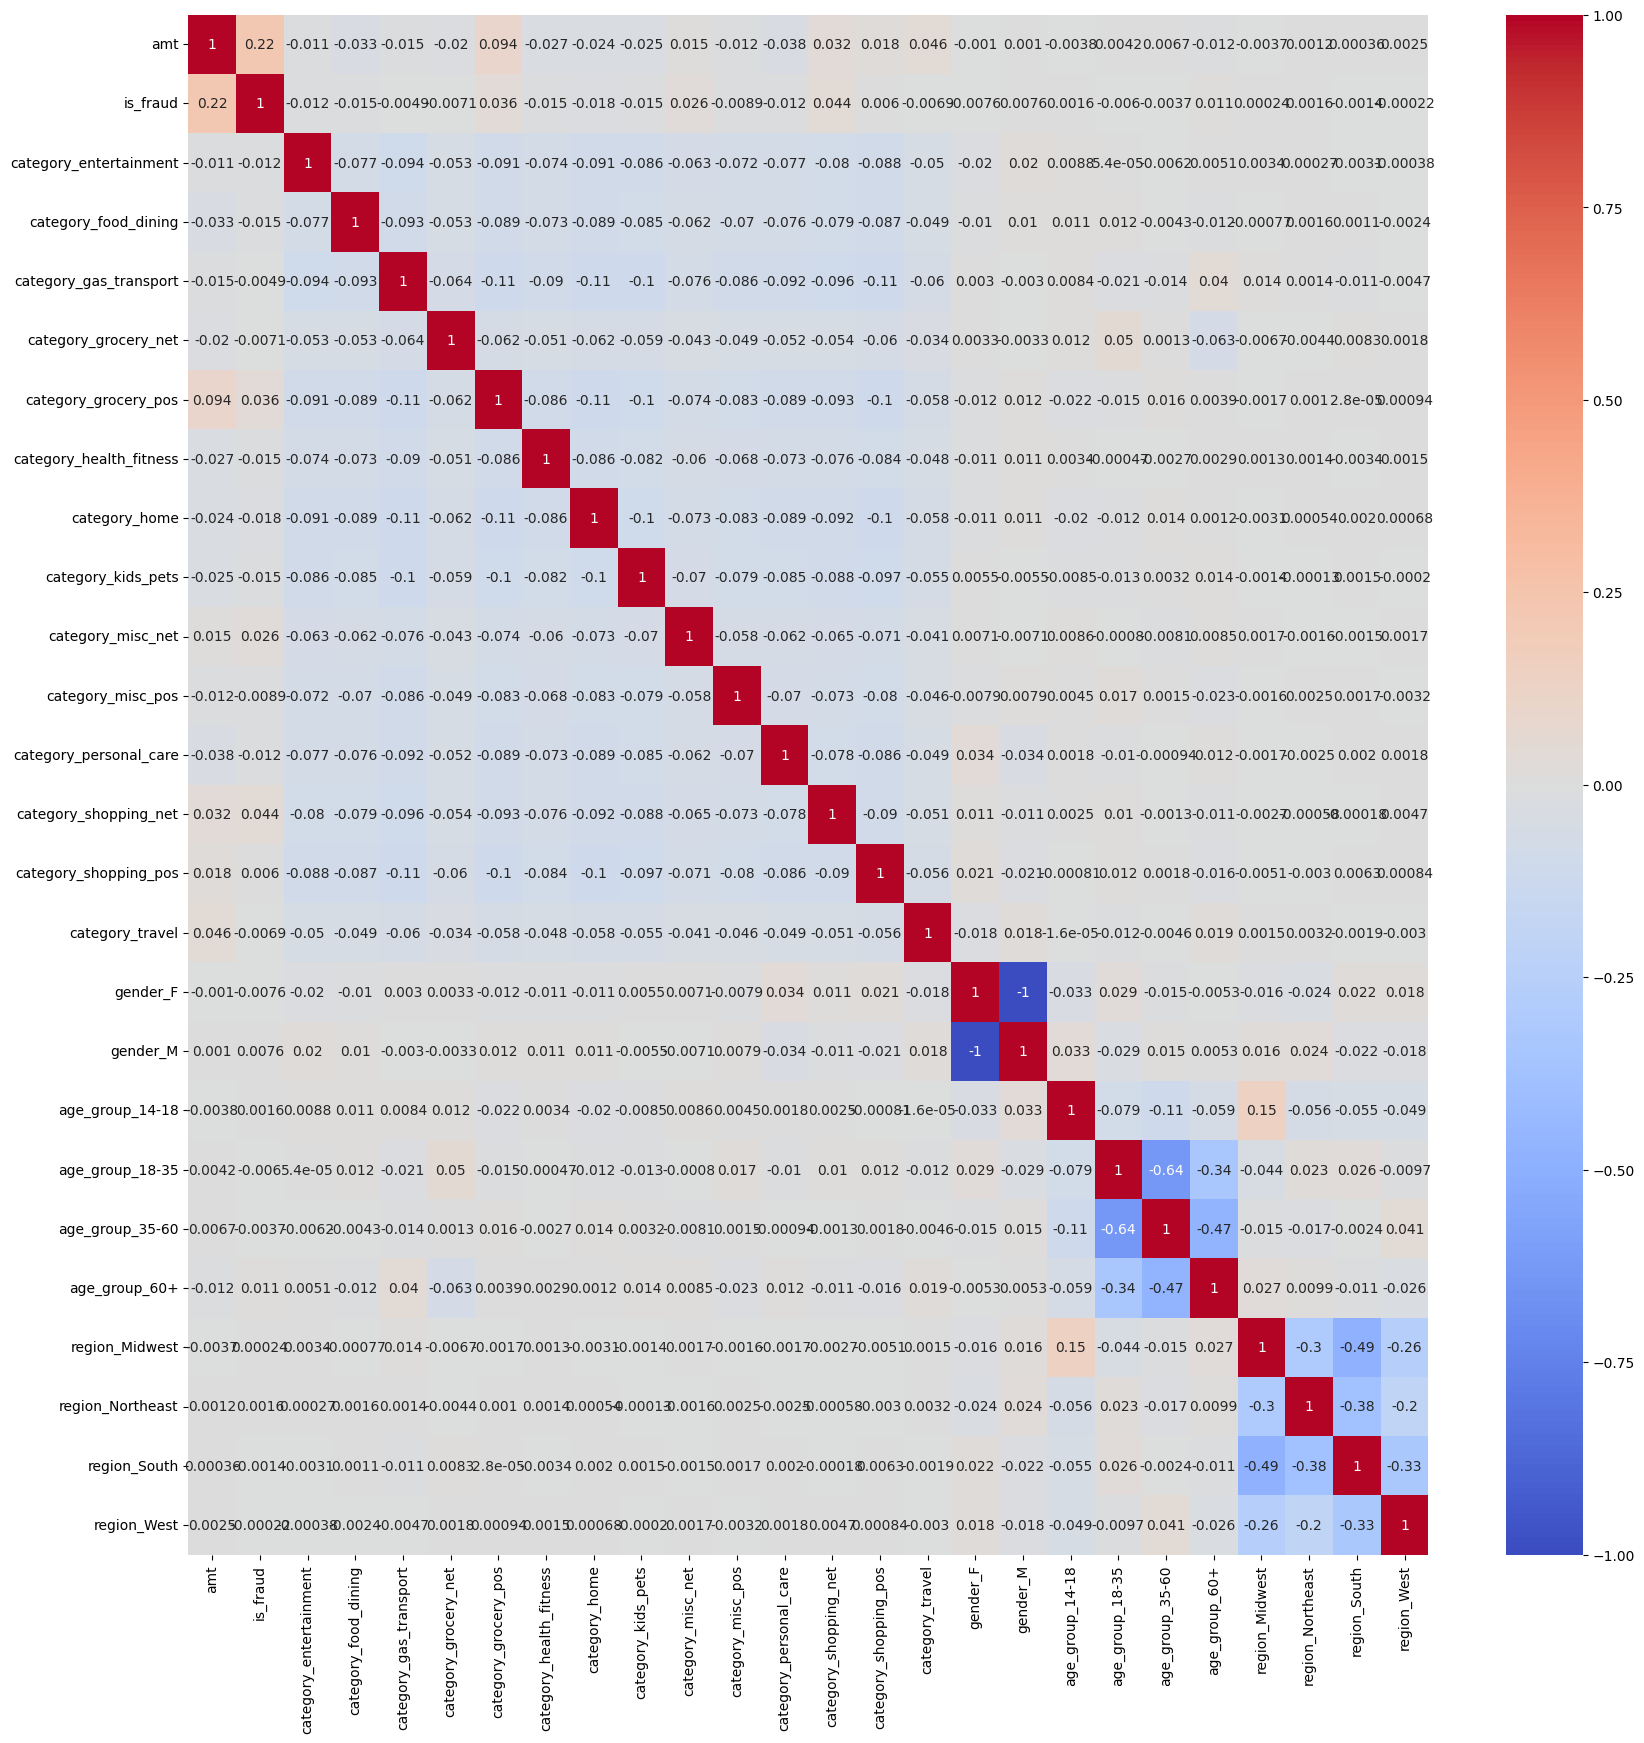

In [41]:
plt.figure(figsize = (20, 20))
sns.heatmap(enc_df.corr(), annot=True, cmap='coolwarm')

In [42]:
# Calculate the correlation matrix
corr_matrix = enc_df.corr()

# Convert the correlation matrix to a list of tuples
corr_list = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Remove the diagonal elements (correlation of a variable with itself)
corr_list = corr_list[corr_list != 1]

print(corr_list)

is_fraud         amt                     0.219404
region_Midwest   age_group_14-18         0.147024
amt              category_grocery_pos    0.094389
age_group_18-35  category_grocery_net    0.050211
category_travel  amt                     0.046097
                                           ...   
region_South     region_Northeast       -0.377026
age_group_60+    age_group_35-60        -0.471698
region_South     region_Midwest         -0.488031
age_group_18-35  age_group_35-60        -0.637730
gender_M         gender_F               -1.000000
Length: 325, dtype: float64


In [43]:
# enc_df.to_csv('enc_df.csv', encoding='utf-8', index=False)

Logistic Regression

In [44]:
X_train = enc_df.drop(columns=['is_fraud'], inplace=False)
y_train = enc_df['is_fraud']

In [45]:
# scaler = StandardScaler()

In [46]:
# X_train = scaler.fit_transform(X_train)

In [47]:
# log_reg = LogisticRegression(penalty="l2", fit_intercept=False, random_state=42)
# log_reg.fit(X_train, y_train)

In [48]:
# joblib.dump(log_reg, "log_reg.pkl")

In [49]:
log_reg = joblib.load("pkls/log_reg.pkl")

c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator LogisticRegression from version 1.5.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [50]:
test_df = pd.read_csv("data/fraudTest.csv")

In [51]:
test_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [52]:
test_df.drop(axis=1, columns=["Unnamed: 0", "cc_num", "merchant", "first", "last", "street", "city", "zip", "lat", "long", "city_pop", "job", "trans_num", "unix_time", "merch_lat", "merch_long"], inplace=True)

In [53]:
test_df["region"] = test_df.state.map(state_to_region)

In [54]:
test_df["trans_year"] = pd.Series(pd.to_datetime(test_df.trans_date_trans_time)).dt.year
test_df["dob"] = pd.Series(pd.to_datetime(test_df.dob)).dt.year

age = pd.Series(test_df.trans_year - test_df.dob)
test_df["age"] = age

bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
test_df["age_group"] = pd.cut(test_df['age'], bins=bins, labels=labels, right=True)

In [55]:
test_df.drop(axis=1, columns=["dob", "trans_year", "trans_date_trans_time", "age", "state"], inplace=True)

In [56]:
ohe_cols = ['category', 'gender', 'age_group', 'region']
num_features = ['amt', 'is_fraud']
enc_test = OneHotEncoder(sparse_output = False)
temp = enc_test.fit_transform(test_df[ohe_cols])
ohc_df_test = pd.DataFrame(temp, columns = enc_test.get_feature_names_out())
ohc_df_test.reset_index(drop=True, inplace=True)
ohc_df_test

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,age_group_14-18,age_group_18-35,age_group_35-60,age_group_60+,region_Midwest,region_Northeast,region_South,region_West,region_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
555715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
555716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
555717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
enc_df_test = pd.concat([test_df[num_features].reset_index(), ohc_df_test], axis=1)
enc_df_test.drop(axis=1, columns=['index', 'region_nan'], inplace=True)
enc_df_test

,amt,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,age_group_14-18,age_group_18-35,age_group_35-60,age_group_60+,region_Midwest,region_Northeast,region_South,region_West
0,2.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,29.84,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41.28,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,60.05,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
555715,111.84,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
555716,86.88,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
555717,7.99,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [58]:
# enc_df_test.to_csv('enc_df_test.csv', encoding='utf-8', index=False)

In [59]:
X_test = enc_df_test.drop(columns=['is_fraud'], inplace=False)
y_test = enc_df_test['is_fraud']

In [60]:
y_test.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [61]:
# scaler = StandardScaler()
# X_test = scaler.fit_transform(X_test)

In [62]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9955733023344532

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9955733023344532
Confusion Matrix:
 [[553259    315]
 [  2145      0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [65]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

y_pred = log_reg.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    555404
           1       0.00      0.00      0.00       315

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       1.00      1.00      1.00    555719



In [66]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
result_array_log = [{'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'model':'Log Reg'}]

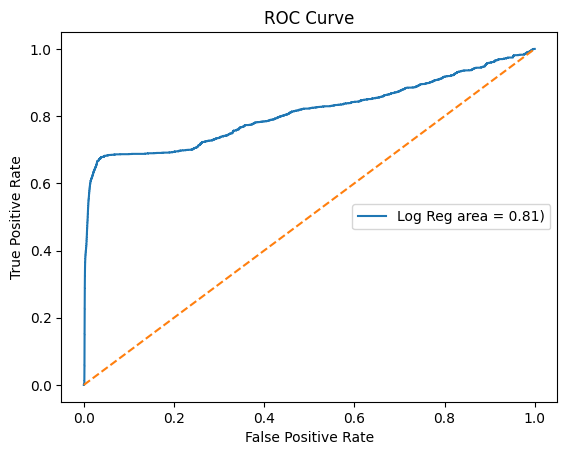

In [67]:
def show_roc_plot(array):
    fig = plt.figure()
    for ar in array:
        plt.plot(ar['fpr'], ar['tpr'], label=f'{ar["model"]} area = {ar["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
    plt.legend(loc='right')
    plt.show()

show_roc_plot(result_array_log)

Text(50.722222222222214, 0.5, 'Actual')

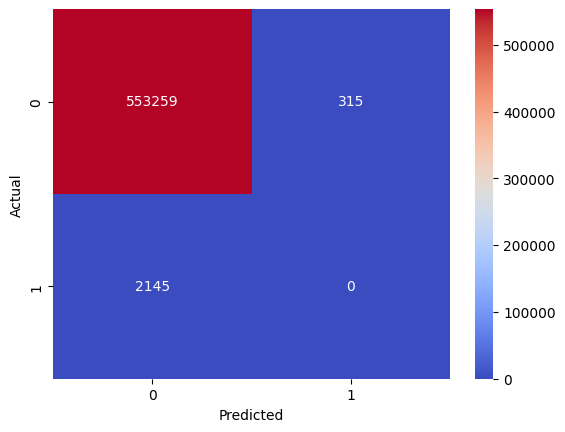

In [68]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [69]:
# log_reg2 = LogisticRegression(penalty="l2", fit_intercept=False, random_state=42, class_weight="balanced")
# log_reg2.fit(X_train, y_train)

In [70]:
# joblib.dump(log_reg2, "log_reg2.pkl")

In [71]:
log_reg2 = joblib.load("pkls/log_reg2.pkl")

c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator LogisticRegression from version 1.5.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [72]:
y_pred2 = log_reg2.predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8953697822100738
Confusion Matrix:
 [[495997  57577]
 [   568   1577]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.94    553574
           1       0.03      0.74      0.05      2145

    accuracy                           0.90    555719
   macro avg       0.51      0.82      0.50    555719
weighted avg       1.00      0.90      0.94    555719



In [74]:
y_pred_prob = log_reg2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
result_array_log = [{'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'model':'Log Reg'}]

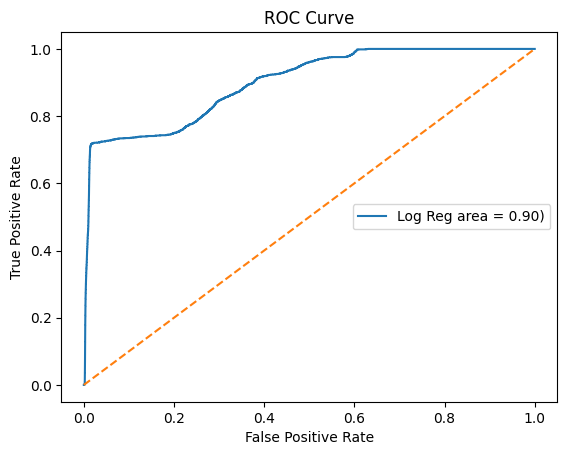

In [75]:
show_roc_plot(result_array_log)

Text(50.722222222222214, 0.5, 'Actual')

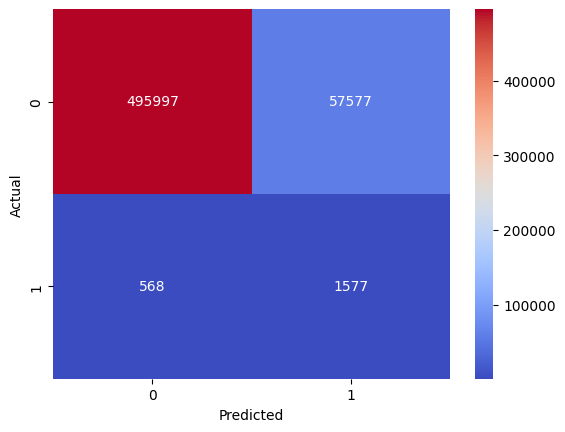

In [76]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Although the model is now less biased towards wrongly classifying fraudulent transactions as non-fraudulent, the model has an underwhelming accuracy as demonstrated by the many false negatives and false positives.

Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
# rf = RandomForestClassifier(class_weight="balanced", random_state=42)
# rf.fit(X_train, y_train)

In [79]:
import joblib

In [80]:

# # save
# joblib.dump(rf, "randomForest.pkl")

In [81]:
rf = joblib.load("pkls/randomForest.pkl")

c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [82]:
y_pred_random_forest = rf.predict(X_test)
y_pred_random_forest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
accuracy = accuracy_score(y_test, y_pred_random_forest)
conf_matrix = confusion_matrix(y_test, y_pred_random_forest)
class_report = classification_report(y_test, y_pred_random_forest)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9962571011608384
Confusion Matrix:
 [[552327   1247]
 [   833   1312]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.51      0.61      0.56      2145

    accuracy                           1.00    555719
   macro avg       0.76      0.80      0.78    555719
weighted avg       1.00      1.00      1.00    555719



Text(50.722222222222214, 0.5, 'Actual')

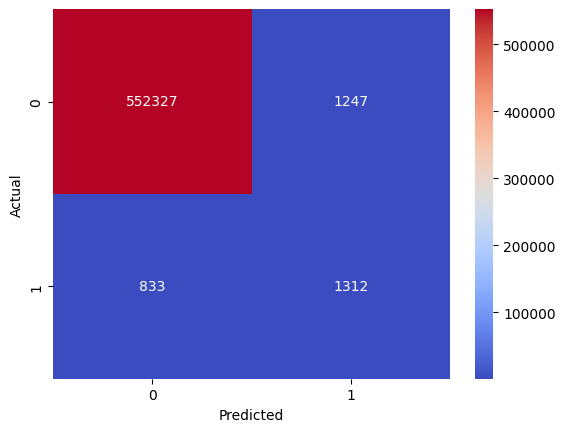

In [84]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [85]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
result_array_random_forest = [{'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'model':'Random Forest'}]

In [86]:
combine_array = result_array_log + result_array_random_forest

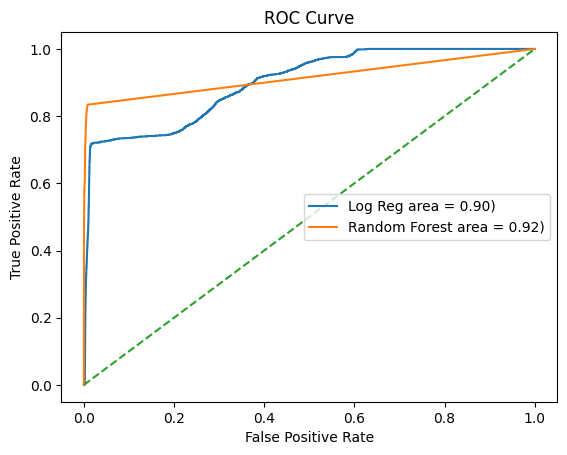

In [87]:
show_roc_plot(combine_array)

Other classifiers

In [88]:
logreg_coefs = log_reg2.coef_
logreg_coefs[0]

array([ 0.01050599, -1.52099743,  0.16508532,  1.56924444,  1.26244172,
        0.64846585,  0.31390019, -0.43839297,  0.75789778, -1.918198  ,
        0.93306381,  0.99718361, -2.97592319, -3.0617542 ,  1.06968022,
       -1.04003769, -1.15826517, -0.34460111, -0.63026887, -0.62328363,
       -0.60014925, -0.47612909, -0.54319386, -0.58266197, -0.51456885])

In [89]:
train_mse = mean_squared_error(y_train, log_reg2.predict(X_train))
test_mse = mean_squared_error(y_test, log_reg2.predict(X_test))
print(train_mse)
print(test_mse)

0.10500395241675825
0.1046302177899262


In [90]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge

In [91]:
pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 1, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('log_reg', LogisticRegression())])
pipe.fit(X_train, y_train)
logreg_coefs = pipe.named_steps['log_reg'].coef_
logreg_coefs[0]

array([ 0.4633628 , -0.01764687, -0.1600453 ,  0.16846481,  0.04929916,
        0.4378868 , -0.18583775, -0.2008342 , -0.07181562,  0.30457954,
        0.01230349, -0.00590705,  0.36432721,  0.10619103, -1.21409146,
       -0.06589643,  0.06589643,  0.02303555, -0.07418544, -0.03007971,
        0.11664199, -0.00232395,  0.01592445, -0.01696179, -0.00500623])

In [92]:
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out()
reg_df = pd.DataFrame({'feature': feature_names, 'coef': logreg_coefs[0]})
reg_df.sort_values('coef', key=abs, ascending=False)

,feature,coef
14,category_travel,-1.214091
0,amt,0.463363
5,category_grocery_pos,0.437887
12,category_shopping_net,0.364327
9,category_misc_net,0.304580
7,category_home,-0.200834
6,category_health_fitness,-0.185838
3,category_gas_transport,0.168465
2,category_food_dining,-0.160045
20,age_group_60+,0.116642
